In [1]:
import sys
sys.path.insert(0, "../src/CenterNet/")

In [2]:
import pathlib
from time import sleep
import json
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

data_path = pathlib.Path("../data/")
anno_path = data_path / "dtc_train_annotations"
image_path = data_path / "dtc_train_images"

train_ratio = 0.8

In [3]:
frame = []
bbox = []
for i, p in enumerate(anno_path.glob("*.json")):
    with open(p) as f:
        anno = json.load(f)
    
    frame.append({
        "file": p.stem,
        "id": i,
        "route": anno["attributes"]["route"],
        "timeofday": anno["attributes"]["timeofday"],
        "frameIndex": anno["frameIndex"],
    })
    
    for label in anno["labels"]:
        bbox.append({
            "id": i,
            "category": label["category"],
            **label["box2d"],
        })

frame = pd.DataFrame(frame)
bbox = pd.DataFrame(bbox)

In [23]:
(sorted_frame.route + "_" + sorted_frame.timeofday).unique()

array(['Saitama_day', 'Saitama_morning', 'Saitama_night', 'Tokyo1_day',
       'Tokyo1_morning', 'Tokyo1_night', 'Tokyo2_day'], dtype=object)

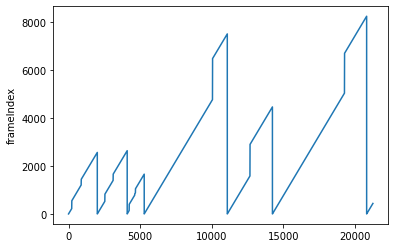

In [8]:
sorted_frame = frame.sort_values(["route", "timeofday", "frameIndex"]).reset_index(drop=True)
group_idx = sorted_frame.frameIndex.diff().fillna(1.0).abs().gt(10).cumsum() # 10枚以上抜けがあるところ

sorted_frame.frameIndex.plot()

plt.ylabel("frameIndex")
# group_idx.astype(int).plot(secondary_y=True)
plt.show()

In [5]:
groups = [sorted_frame[group_idx==i] for i in group_idx.unique()]

train_df = []
valid_df = []

for group in groups:
    n_valid = int(len(group) * (1-train_ratio))
    left = (len(group) - n_valid) // 2
    right = left + n_valid
    train_df.append(group.iloc[:left])
    valid_df.append(group.iloc[left:right])
    train_df.append(group.iloc[right:])

train_df = pd.concat(train_df).reset_index(drop=True)
valid_df = pd.concat(valid_df).reset_index(drop=True)

In [6]:
train_df.to_csv(data_path/"train_split.csv", index=False, header=True)
valid_df.to_csv(data_path/"valid_split.csv", index=False, header=True)

# Instant Replay

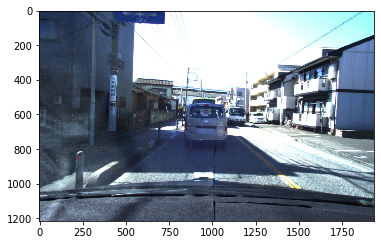

KeyboardInterrupt: 

In [7]:
for name in sorted_frame.file:
    
    img = cv2.imread((image_path / f"{name}.jpg").as_posix())
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img)
    
    clear_output(wait=True)
    plt.show()

    sleep(0.1)